# Import & Configuration

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import warnings

In [96]:
pd.set_option('max_columns', None)
warnings.filterwarnings('ignore')
%matplotlib inline

In [97]:
PATH_TO_DATA = '../data/raw'

# Class for EDA

In [140]:
class Frame:
    def __init__(self, path_to_df, index_col=None, target=None):
        self._df = pd.read_csv(os.path.join(PATH_TO_DATA, path_to_df), index_col=index_col)
        self._target = target
        self._cat_features = []
        self._num_features = []
        self._bin_features = []
        self._init_feat_descriptors()
        
    def _init_feat_descriptors(self):
        for feat in self.df.columns:
            if self.df[feat].dtypes == 'O':
                self._cat_features.append(feat)
            else:
                self._num_features.append(feat)
            if self.df[feat].nunique() == 2:
                self._bin_features.append(feat)
    
    @property
    def target(self):
        return self._target
    
    @property
    def df(self):
        return self._df
    
    @property
    def cat_features(self):
        return self._cat_features
    
    @property
    def num_features(self):
        return self._num_features
    
    @property
    def bin_features(self):
        return self._bin_features
    
    def count_NaN(self):
        for col in self.df.columns:
            qty_nan = sum(self.df[col].isna())
            if qty_nan == 0:
                print(f"{col} is entire")
            else:
                print(f"{col} has {qty_nan} NaN values")
                
    def count_unique(self):
        print(f'There are {self.df.isnull().any().sum()} columns in dataset ' + 
              f'with missing values from {self.df.shape[1]}.')
        for col in self.df.columns:
            qty_unq = len(self.df[col].unique())
            print(f"{col} has {qty_unq} unique values")
    
    def info(self):
        return self.df.info()
    
    def describe(self, include=None):
        return self.df.describe(include=include)
    
    def shrink(self):
        for col in self.num_features:
            if str(self.df[col].dtype).startswith('float'):
                self.df[col] = pd.to_numeric(self.df[col], downcast='float', errors='ignore')
            else:
                self.df[col] = pd.to_numeric(self.df[col], downcast='integer', errors='ignore')
                
    

In [148]:
class EDA:
    def __init__(self, frame):
        self._frame = frame
        
    @property
    def frame(self):
        return self._frame
    
    def numeric_plot(self, interactive=False, features='all'):
        if features == 'all':
            features = self.frame.cat_features
        elif isinstance(features, list):
            features = features
        else:
            return
        if not interactive:
            plt.figure(figsize=(16, 32))
            i = 1
            for feat in features:
                rows = len(self.frame.num_features)
                plt.subplot(rows, 2, i)
                sns.distplot(self.frame.df[feat], bins=50)
                plt.title(f'Distribution of {feat}');
                plt.subplot(rows, 2, i + 1)
                sns.violinplot(self.frame.df[feat])
                plt.title(f'Violin of {feat}');
                i += 2
                print(self.frame.df[feat].value_counts().sort_values(ascending=False).head(10), end='\n\n')
                
    def cat_plot(self, interactive=False, features='all'):
        if features == 'all':
            features = self.frame.cat_features
        elif isinstance(features, list):
            features = features
        else:
            return
        if not interactive:
            plt.figure(figsize=(16, 32))
            for i, feat in enumerate(features):
                plt.subplot(len(features), 1, i + 1)
                g = sns.countplot(self.frame.df[feat])
                g.set_xticklabels(g.get_xticklabels(),rotation=90)
                plt.title(f'Distribution of {feat}');
                plt.subplots_adjust(wspace = 0.2, hspace = 1.3,top = 0.9)
                print(self.frame.df[feat].value_counts().sort_values(ascending=False).head(10), end='\n\n')

# Clients lookup

In [129]:
clients = Frame('clients.csv', index_col='client_id')

In [130]:
clients.describe(include='all')

,first_issue_date,first_redeem_date,age,gender
count,400162,364693,400162.000000,400162
unique,396725,362527,NaN,3
top,2017-08-04 19:37:41,2017-12-29 17:00:11,NaN,U
freq,3,3,NaN,185706
mean,NaN,NaN,46.488112,NaN
std,NaN,NaN,43.871218,NaN
min,NaN,NaN,-7491.000000,NaN
25%,NaN,NaN,34.000000,NaN
50%,NaN,NaN,45.000000,NaN
75%,NaN,NaN,59.000000,NaN


In [131]:
clients.cat_features, clients.num_features

(['first_issue_date', 'first_redeem_date', 'gender'], ['age'])

In [132]:
clients.count_NaN()
print("--------------------------------")
clients.count_unique()

first_issue_date is entire
first_redeem_date has 35469 NaN values
age is entire
gender is entire
--------------------------------
There are 1 columns in dataset with missing values from 4.
first_issue_date has 396725 unique values
first_redeem_date has 362528 unique values
age has 290 unique values
gender has 3 unique values


33    9437
36    9394
32    9354
31    9286
35    9152
34    9119
37    8653
40    8648
38    8633
59    8460
Name: age, dtype: int64



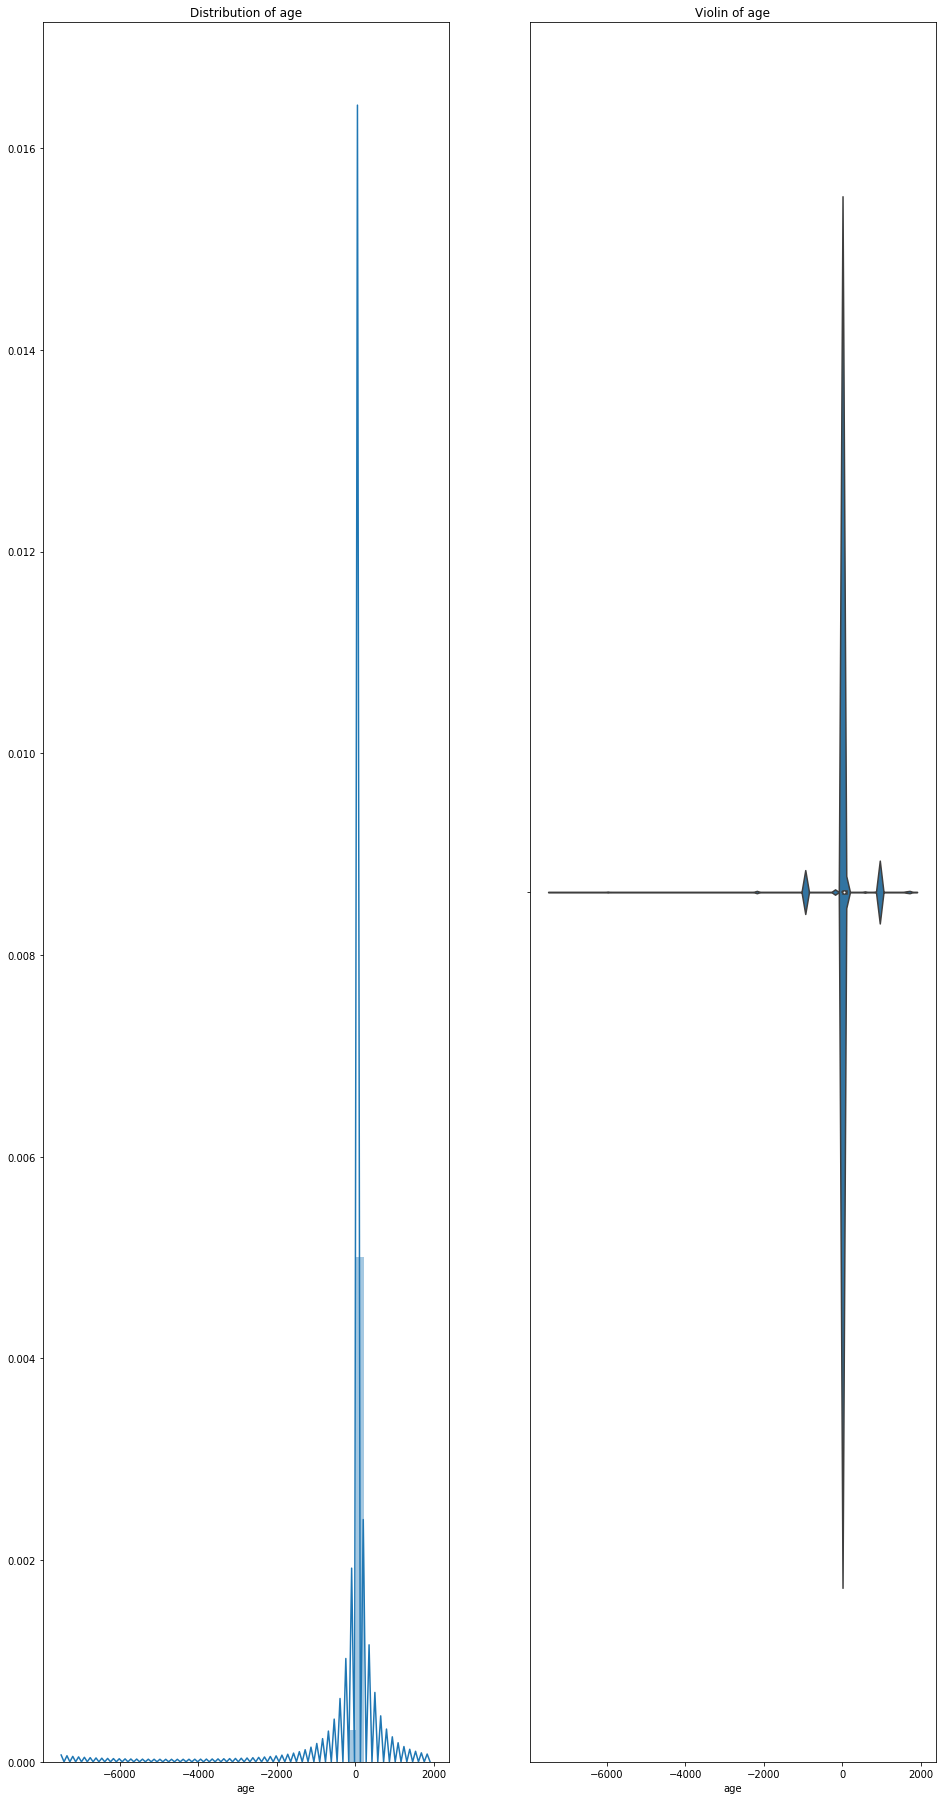

In [133]:
clients_EDA = EDA(clients)
clients_EDA.cat_plot(['gender'])
clients_EDA.numeric_plot()

In [134]:
clients.df['age'].describe()

count    400162.000000
mean         46.488112
std          43.871218
min       -7491.000000
25%          34.000000
50%          45.000000
75%          59.000000
max        1901.000000
Name: age, dtype: float64

## Work with numeric features

In [99]:
clients[clients['age'] <= 0].shape[0], clients[clients['age'] > 90].shape[0], clients.shape[0]

(138, 1139, 400162)

In [107]:
# age has invalid values below 0 and above 90

# Products lookup

In [142]:
products = Frame('products.csv', index_col='product_id')

print(products.cat_features, products.num_features, products.bin_features)

['level_1', 'level_2', 'level_3', 'level_4', 'brand_id', 'vendor_id'] ['segment_id', 'netto', 'is_own_trademark', 'is_alcohol'] ['is_own_trademark', 'is_alcohol']


In [144]:
products.count_NaN()
print("------------------------")
products.count_unique()

level_1 has 3 NaN values
level_2 has 3 NaN values
level_3 has 3 NaN values
level_4 has 3 NaN values
segment_id has 1572 NaN values
brand_id has 5200 NaN values
vendor_id has 34 NaN values
netto has 3 NaN values
is_own_trademark is entire
is_alcohol is entire
------------------------
There are 8 columns in dataset with missing values from 10.
level_1 has 4 unique values
level_2 has 43 unique values
level_3 has 202 unique values
level_4 has 791 unique values
segment_id has 117 unique values
brand_id has 4297 unique values
vendor_id has 3194 unique values
netto has 781 unique values
is_own_trademark has 2 unique values
is_alcohol has 2 unique values


e344ab2e71    22183
c3d3a8e8c6    16573
ec62ce61e3     4279
Name: level_1, dtype: int64

52f13dac0c    8891
ad2b2e17d2    6631
f2333c90fb    3310
ed2ad1797c    3257
703f4b6eb0    2396
749c619457    2393
14d373dff5    2377
c2a3ea8d5e    2209
1d2939ba1d    1717
f93982269d    1343
Name: level_2, dtype: int64

ca69ed9de2    3737
419bc5b424    2729
0f84eb7480    2571
38816369ce    2324
6b55683dad    1862
d3cfe81323    1437
0bcfc6519b    1306
a6b0dd76e0    1033
e33cc0b2a4    1001
eda7b2976b     889
Name: level_3, dtype: int64

105.0    5360
150.0    2745
271.0    1690
259.0    1523
85.0     1291
148.0    1073
1.0       912
157.0     876
263.0     873
321.0     848
Name: segment_id, dtype: int64



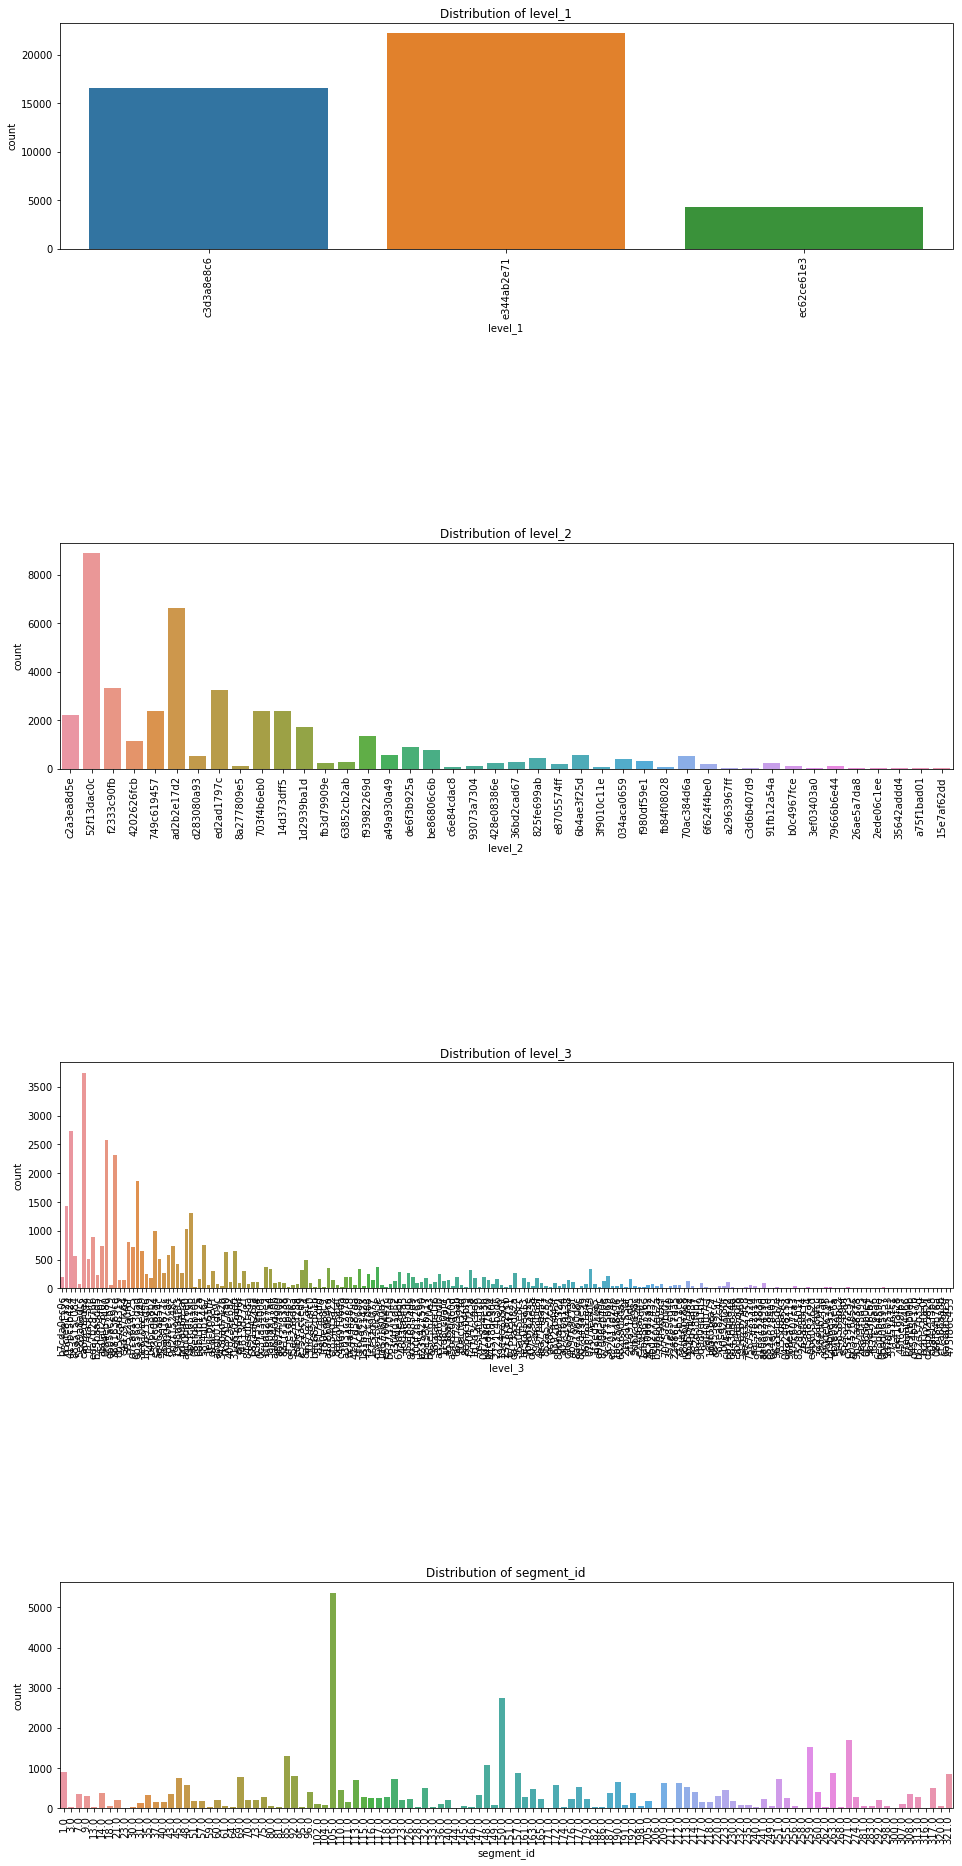

In [150]:
products_eda = EDA(cl)
products_eda.cat_plot(features=['level_1', 'level_2', 'level_3', 'segment_id'])

0.50    4256
1.00    2953
0.40    2491
0.20    2410
0.30    2354
0.10    1988
0.25    1835
0.35    1330
0.45    1256
0.15    1074
Name: netto, dtype: int64



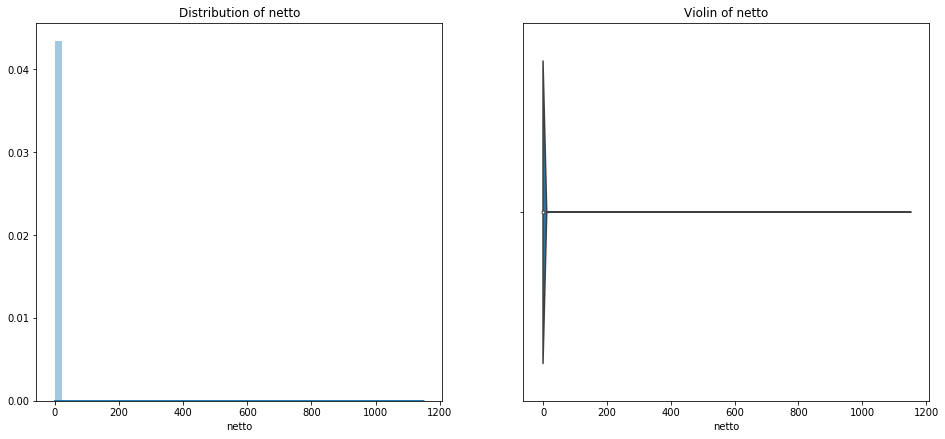

In [151]:
products_eda.numeric_plot(features=['netto'])

## Numeric feature

In [269]:
products[products['netto'] > 4].shape[0], products[products['netto'] <= 4].shape[0]

(105, 42933)

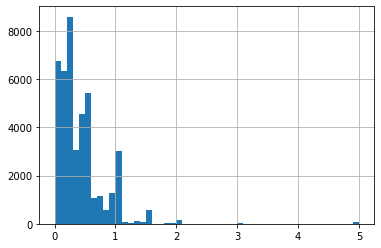

In [264]:
products[products['netto'] <= 5]['netto'].hist(bins=50);

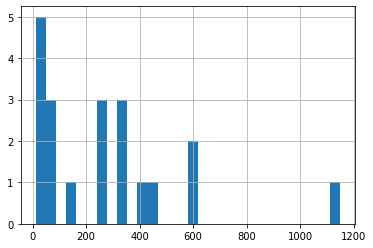

In [267]:
products[products['netto'] > 10]['netto'].hist(bins=30);

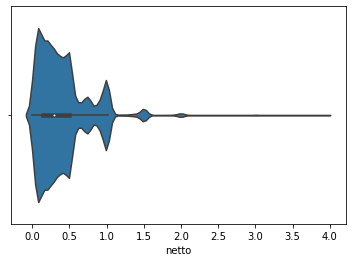

In [270]:
sns.violinplot(products[products['netto'] <= 4]['netto']);

## Level features

In [271]:
level_feat = []
for col in products.columns:
    if col.startswith('level'):
        level_feat.append(col)

In [280]:
bad_products = products[products['level_1'].isna()].index
bad_products

Index(['04d86b4b50', '48cc0e256d', '6a3d708544'], dtype='object', name='product_id')

In [281]:
products.drop(bad_products, inplace=True)

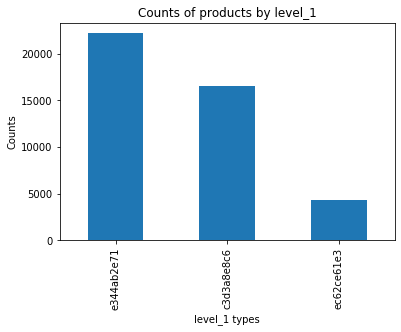

In [292]:
ax = products[level_feat[0]].value_counts().plot(kind='bar', title='Counts of products by level_1');
ax.set_xlabel("level_1 types");
ax.set_ylabel("Counts");

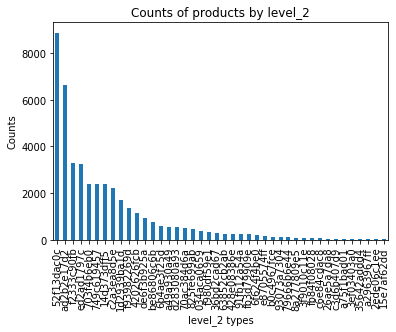

In [293]:
ax = products[level_feat[1]].value_counts().plot(kind='bar', title='Counts of products by level_2');
ax.set_xlabel("level_2 types");
ax.set_ylabel("Counts");

## ID Features

In [298]:
id_feat = []
for col in products.columns:
    if col.endswith('id'):
        id_feat.append(col)

In [301]:
for feat in id_feat:
    products[feat].fillna("NA_ID", inplace=True)

In [319]:
print(f"TOP10 distribution for {id_feat[0]}")
products[id_feat[0]].value_counts()[:10]

TOP10 distribution for segment_id


105.0    5360
150.0    2745
271.0    1690
NA_ID    1569
259.0    1523
85.0     1291
148.0    1073
1.0       912
157.0     876
263.0     873
Name: segment_id, dtype: int64

# Purchases lookup

In [203]:
target = pd.read_csv(os.path.join(PATH_TO_DATA, 'uplift_train.csv'), index_col='client_id')

In [170]:
purchases = Frame(('purchases.csv'), index_col=0)

In [171]:
purchases.shrink()

In [172]:
purchases.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45786568 entries, 0 to 45786567
Data columns (total 13 columns):
client_id                  object
transaction_id             object
transaction_datetime       object
regular_points_received    float32
express_points_received    float32
regular_points_spent       float32
express_points_spent       float32
purchase_sum               float32
store_id                   object
product_id                 object
product_quantity           float32
trn_sum_from_iss           float32
trn_sum_from_red           float32
dtypes: float32(8), object(5)
memory usage: 3.4+ GB


In [154]:
purchases.head(5)

,Unnamed: 0,client_id,transaction_id,transaction_datetime,regular_points_received,express_points_received,regular_points_spent,express_points_spent,purchase_sum,store_id,product_id,product_quantity,trn_sum_from_iss,trn_sum_from_red
0,0,000012768d,7e3e2e3984,2018-12-01 07:12:45,10.0,0.0,0.0,0.0,1007.0,54a4a11a29,9a80204f78,2.0,80.0,NaN
1,1,000012768d,7e3e2e3984,2018-12-01 07:12:45,10.0,0.0,0.0,0.0,1007.0,54a4a11a29,da89ebd374,1.0,65.0,NaN
2,2,000012768d,7e3e2e3984,2018-12-01 07:12:45,10.0,0.0,0.0,0.0,1007.0,54a4a11a29,0a95e1151d,1.0,24.0,NaN
3,3,000012768d,7e3e2e3984,2018-12-01 07:12:45,10.0,0.0,0.0,0.0,1007.0,54a4a11a29,4055b15e4a,2.0,50.0,NaN
4,4,000012768d,7e3e2e3984,2018-12-01 07:12:45,10.0,0.0,0.0,0.0,1007.0,54a4a11a29,a685f1916b,1.0,22.0,NaN


In [169]:
purchases.describe(include='all')

,client_id,transaction_id,transaction_datetime,regular_points_received,express_points_received,regular_points_spent,express_points_spent,purchase_sum,store_id,product_id,product_quantity,trn_sum_from_iss,trn_sum_from_red
count,45786568,45786568,45786568,4.578657e+07,4.578657e+07,4.578657e+07,4.578657e+07,4.578657e+07,45786568,45786568,4.578657e+07,4.578657e+07,3.043356e+06
unique,400162,8045201,4260251,NaN,NaN,NaN,NaN,NaN,13882,42530,NaN,NaN,NaN
top,7a73214c0b,f9a45c98e1,2019-02-07 15:12:53,NaN,NaN,NaN,NaN,NaN,cfbbd53ab7,4009f09b04,NaN,NaN,NaN
freq,2513,116,150,NaN,NaN,NaN,NaN,NaN,18984,1824586,NaN,NaN,NaN
mean,NaN,NaN,NaN,6.886329e+00,6.084099e-02,-5.304835e+00,-3.181049e-01,6.389415e+02,NaN,NaN,7.930188e-01,5.875556e+01,7.670548e+01
std,NaN,NaN,NaN,1.195104e+01,2.425819e+00,3.559064e+01,3.279348e+00,7.569911e+02,NaN,NaN,3.126700e+00,8.423547e+01,8.416062e+01
min,NaN,NaN,NaN,0.000000e+00,0.000000e+00,-5.066000e+03,-3.000000e+02,0.000000e+00,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00
25%,NaN,NaN,NaN,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.860000e+02,NaN,NaN,1.000000e+00,3.000000e+01,3.100000e+01
50%,NaN,NaN,NaN,3.800000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.390000e+02,NaN,NaN,1.000000e+00,5.100000e+01,5.500000e+01
75%,NaN,NaN,NaN,1.030000e+01,0.000000e+00,0.000000e+00,0.000000e+00,9.760000e+02,NaN,NaN,1.000000e+00,9.000000e+01,9.500000e+01


# Aggregative features

## mean()

In [175]:
df_agg = purchases.df.groupby('client_id').mean()
df_agg.head()

,regular_points_received,express_points_received,regular_points_spent,express_points_spent,purchase_sum,product_quantity,trn_sum_from_iss,trn_sum_from_red
client_id,,,,,,,,
000012768d,7.551923,0.000000,0.000000,0.0,784.788452,1.038462,53.942307,NaN
000036f903,2.150000,2.222222,0.000000,0.0,362.746918,1.043210,60.555557,NaN
000048b7a6,3.907143,0.000000,0.000000,0.0,530.785706,1.625000,64.589287,NaN
000073194a,6.326829,0.000000,-7.024390,0.0,764.877075,1.548780,116.024391,21.833334
00007c7133,5.538554,0.000000,-20.240963,0.0,650.586975,1.000000,78.168678,78.857140


In [215]:
df_agg['target'] = target['treatment_flg'].astype(str) + target['target'].astype(str)
df_agg['target'].fillna("-1", inplace=True)

In [287]:
df_agg['target_2'] = target['target']
df_agg['treatment'] = target['treatment_flg']
df_agg['target_2'].fillna("-1", inplace=True)
df_agg['treatment'].fillna("-1", inplace=True)

In [272]:
mapper = ['not in train', 'flg=1 & target=1', 
          'flg=0 & target=0', 'flg=0 & target=1', 
          'flg=1 & target=0']

In [304]:
def plot_num_target(feat):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.violinplot(y=df_agg[feat], x=df_agg['target'])
    plt.title(f'Distribution of {feat}');
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df_agg[feat], x=df_agg['treatment'], hue=df_agg['target_2']);
    plt.title(f'Boxes of {feat}');

In [307]:
df_agg.columns

Index(['regular_points_received', 'express_points_received',
       'regular_points_spent', 'express_points_spent', 'purchase_sum',
       'product_quantity', 'trn_sum_from_iss', 'trn_sum_from_red', 'target',
       'target_2', 'treatment'],
      dtype='object')

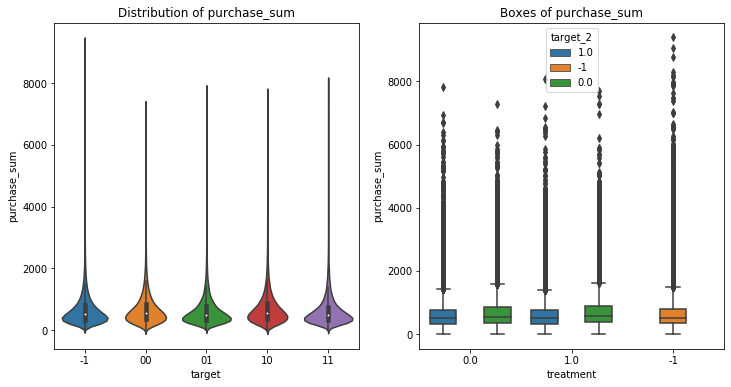

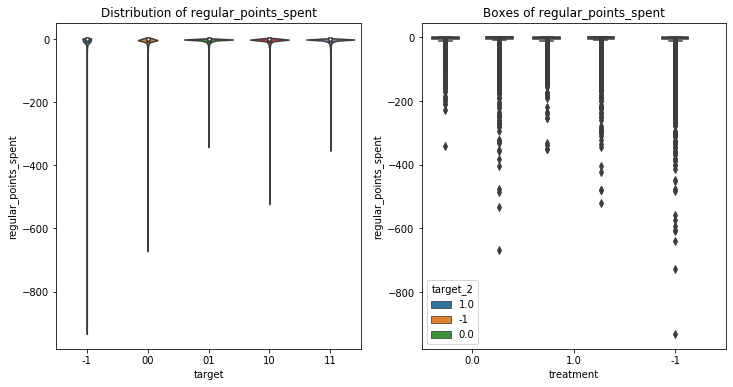

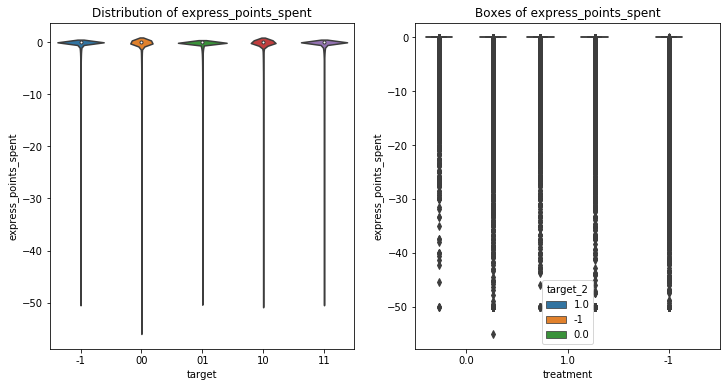

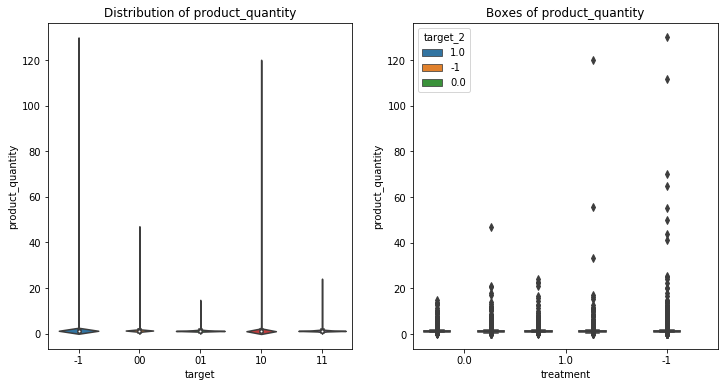

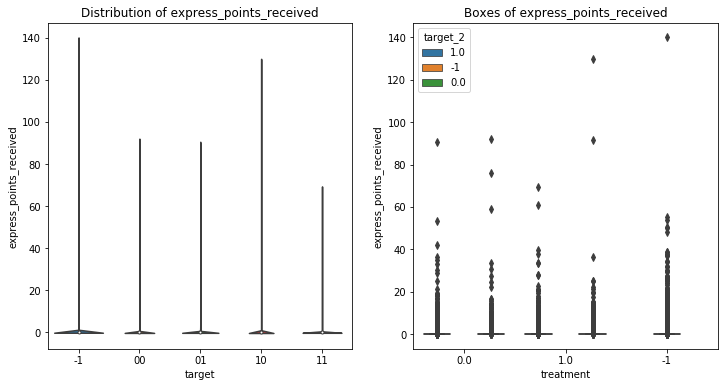

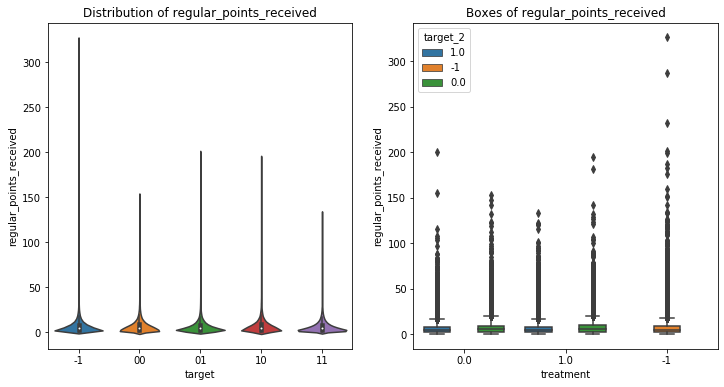

In [312]:
for feat in ['purchase_sum', 'regular_points_spent', 'express_points_spent',
             'product_quantity', 'express_points_received', 'regular_points_received', ]:
    plot_num_target(feat)